# Momentum Portfolios #

In [10]:
# Import Libraries

# Data Management
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from portfolios_toolkit import calculate_analytics
from capm_toolkit import capm_regression
from other_data_functions import rolling_calc_rstr

In [34]:
# Import Data
df_returns = pd.read_csv(r'..\additional_data\stocks_returns.csv')
df_returns = df_returns.rename(columns={'Unnamed: 0':'Date'})
df_returns.set_index('Date', inplace=True)
df_returns.index = pd.to_datetime(df_returns.index)
df_returns = df_returns.dropna(axis=1)

df_returns

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [35]:
# Import the Alphas
df_alphas = pd.read_csv(r'..\additional_data\capm_halpha.csv')
df_alphas.set_index('date', inplace=True)
df_alphas.index = pd.to_datetime(df_alphas.index)
df_alphas = df_alphas[df_returns.columns]

df_alphas

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.000277,-0.000068,-0.000201,1.160180e-04,0.000996,0.000021,-0.001298,0.000098,0.000203,-0.000061,...,0.000484,-0.000642,-0.002515,0.000121,-0.000416,-0.000049,0.000155,-0.000153,-0.000592,0.000638
2016-01-07,0.000209,-0.000099,-0.000118,4.692133e-05,0.000956,0.000020,-0.001234,0.000005,0.000046,-0.000007,...,0.000471,-0.000766,-0.002791,0.000191,-0.000350,0.000118,0.000123,-0.000364,-0.000685,0.000564
2016-01-08,0.000238,-0.000070,-0.000198,1.808381e-05,0.000987,0.000088,-0.001164,0.000013,0.000067,0.000013,...,0.000506,-0.000791,-0.002857,0.000132,-0.000400,0.000111,0.000125,-0.000341,-0.000657,0.000553
2016-01-11,0.000169,-0.000013,-0.000443,4.241150e-05,0.001068,0.000196,-0.001209,0.000043,0.000133,0.000009,...,0.000462,-0.000805,-0.002973,0.000155,-0.000449,0.000089,0.000030,-0.000473,-0.000724,0.000398
2016-01-12,0.000122,-0.000064,-0.000371,7.957055e-05,0.001027,0.000216,-0.001092,0.000042,0.000042,0.000008,...,0.000480,-0.000899,-0.003041,0.000116,-0.000392,0.000122,0.000092,-0.000357,-0.000685,0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.000784,0.000216,0.000960,-7.680996e-06,-0.002441,-0.000914,-0.001818,0.000520,-0.000399,0.000698,...,-0.001032,-0.001134,-0.000918,0.000289,0.000004,-0.000646,-0.000263,-0.000977,0.000307,-0.001323
2024-12-24,-0.000781,0.000205,0.001029,3.173713e-05,-0.002503,-0.000905,-0.001633,0.000534,-0.000475,0.000759,...,-0.000960,-0.001129,-0.000814,0.000382,0.000068,-0.000656,-0.000239,-0.001013,0.000347,-0.001299
2024-12-26,-0.000777,0.000256,0.000997,2.112336e-05,-0.002458,-0.000917,-0.001632,0.000608,-0.000512,0.000749,...,-0.000967,-0.001120,-0.000844,0.000365,0.000062,-0.000671,-0.000217,-0.000987,0.000361,-0.001256


In [36]:
# Create the RS DFs
relative_strenght_long = rolling_calc_rstr(
    df_returns,
    window_size=252,
    half_life=126
).T

relative_strenght_short = rolling_calc_rstr(
    df_returns,
    window_size=28,
    half_life=14,
    min_obs=13
).T

In [37]:
# Calculate the Relative Strenght Index
relative_strenght = (relative_strenght_long - relative_strenght_short).dropna()
relative_strenght = relative_strenght.loc[df_alphas.index]

relative_strenght

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.093737,-0.033356,-0.078738,-0.005277,0.274461,0.019643,-0.398822,0.058240,0.186145,0.063281,...,0.191105,-0.025441,-0.697894,0.064528,-0.059698,0.091371,-0.067762,-0.109500,-0.256439,0.085606
2016-01-07,0.092343,-0.052936,-0.104391,-0.014551,0.265817,0.004114,-0.400382,0.047359,0.179154,0.060148,...,0.175181,-0.031214,-0.715713,0.059487,-0.069759,0.085633,-0.084141,-0.121731,-0.276149,0.076338
2016-01-08,0.080539,-0.081825,-0.113251,-0.030462,0.251257,-0.012667,-0.394961,0.031872,0.159298,0.060845,...,0.160974,-0.042397,-0.734501,0.057537,-0.080545,0.075647,-0.094197,-0.126962,-0.304458,0.068339
2016-01-11,0.076203,-0.089548,-0.118595,-0.037582,0.250004,-0.012709,-0.392155,0.026641,0.156898,0.071035,...,0.149533,-0.052461,-0.733606,0.064807,-0.081690,0.075358,-0.100977,-0.120081,-0.309919,0.060295
2016-01-12,0.067266,-0.089197,-0.115471,-0.041684,0.256531,-0.016222,-0.385274,0.030420,0.164047,0.073531,...,0.147335,-0.062116,-0.711106,0.074153,-0.075245,0.083708,-0.088989,-0.112947,-0.324751,0.067923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.024463,0.252870,0.051979,0.089994,-0.128470,0.057023,-0.269288,0.308793,0.321207,0.307678,...,-0.040745,-0.079188,-0.000340,0.261243,0.087177,-0.013298,0.042709,-0.077645,0.429790,-0.087185
2024-12-24,-0.024550,0.261789,0.045079,0.083858,-0.130709,0.041120,-0.269309,0.301200,0.321265,0.302675,...,-0.018374,-0.084670,0.001136,0.254899,0.084183,-0.024508,0.044126,-0.081952,0.416235,-0.083913
2024-12-26,-0.038962,0.273995,0.046401,0.079661,-0.140513,0.036985,-0.270087,0.287443,0.304456,0.294848,...,-0.028261,-0.093615,0.034493,0.252888,0.077280,-0.038961,0.047976,-0.091458,0.396769,-0.095051


In [38]:
# Now we are going to z-score them
def standardize_zscore(
        variable: pd.DataFrame
) -> pd.DataFrame:
    # Calculate Mean
    mean = variable.mean(axis=1)
    
    # Calculate Cross-Sectional Standard Deviation
    std = variable.std(axis=1)
    
    # Standardize (broadcasting Series across DataFrame rows)
    zscore_df = (variable.subtract(mean, axis = 0)).divide(std, axis = 0)
    
    return zscore_df

In [39]:
# Z-Score Alphas
alphas_zscore_df = standardize_zscore(df_alphas)

alphas_zscore_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.177113,-0.184247,-0.323194,0.008841,0.931053,-0.090787,-1.473010,-0.009911,0.099529,-0.176665,...,0.394723,-0.785183,-2.747834,0.014046,-0.548217,-0.163942,0.049562,-0.273360,-0.733502,0.555679
2016-01-07,0.117484,-0.206407,-0.226768,-0.052820,0.903502,-0.081457,-1.401051,-0.097212,-0.053729,-0.109898,...,0.393314,-0.908222,-3.039695,0.098836,-0.469976,0.021959,0.026918,-0.485324,-0.823254,0.491366
2016-01-08,0.147305,-0.179132,-0.314700,-0.085388,0.941129,-0.011429,-1.337241,-0.090910,-0.033382,-0.091055,...,0.431633,-0.942029,-3.129975,0.035398,-0.528237,0.013280,0.028164,-0.465497,-0.800287,0.480671
2016-01-11,0.094712,-0.093239,-0.536962,-0.035536,1.023133,0.122781,-1.327134,-0.035181,0.057745,-0.069756,...,0.397153,-0.910475,-3.148095,0.080364,-0.543099,0.012202,-0.048494,-0.567153,-0.827145,0.331944
2016-01-12,0.057626,-0.131190,-0.441838,0.014317,0.972893,0.152352,-1.171662,-0.023650,-0.024075,-0.058181,...,0.419546,-0.976160,-3.143781,0.051120,-0.462417,0.057105,0.027275,-0.427548,-0.759784,0.350792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.500758,0.480102,1.209613,0.260495,-2.125763,-0.628004,-1.514667,0.777715,-0.123447,0.952277,...,-0.743955,-0.843994,-0.632088,0.551102,0.272348,-0.365571,0.009732,-0.689863,0.569554,-1.029020
2024-12-24,-0.517256,0.438265,1.236020,0.270259,-2.184995,-0.636753,-1.342703,0.756547,-0.220644,0.974271,...,-0.690360,-0.854549,-0.548709,0.609301,0.305131,-0.396303,0.008280,-0.741711,0.575823,-1.018825
2024-12-26,-0.507346,0.494829,1.214388,0.267076,-2.138944,-0.642820,-1.337372,0.836550,-0.250102,0.972925,...,-0.691623,-0.840634,-0.572099,0.600905,0.306605,-0.404318,0.035547,-0.711177,0.597319,-0.972043


In [40]:
# Z-Score Relative Strenght
rstr_zscore_df = standardize_zscore(relative_strenght)

rstr_zscore_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.276372,-0.257446,-0.448061,-0.139510,1.035450,-0.034839,-1.792483,0.127277,0.664506,0.148449,...,0.685337,-0.224202,-3.048652,0.153689,-0.368089,0.266432,-0.401960,-0.577269,-1.194443,0.242220
2016-01-07,0.308355,-0.301315,-0.517248,-0.140232,1.036349,-0.061901,-1.759392,0.119580,0.672664,0.173249,...,0.655990,-0.210159,-3.082700,0.170474,-0.371915,0.280199,-0.432270,-0.590020,-1.238044,0.241190
2016-01-08,0.308996,-0.367838,-0.498842,-0.153724,1.020654,-0.079545,-1.673186,0.106123,0.637313,0.226898,...,0.644298,-0.203478,-3.088600,0.213110,-0.362502,0.288605,-0.419412,-0.555998,-1.295913,0.258139
2016-01-11,0.305758,-0.386691,-0.508037,-0.169594,1.031831,-0.065683,-1.650866,0.098706,0.642869,0.284165,...,0.612100,-0.231751,-3.077318,0.258147,-0.353860,0.302227,-0.434434,-0.514246,-1.307314,0.239299
2016-01-12,0.255887,-0.394334,-0.503520,-0.196880,1.042430,-0.091065,-1.624759,0.102766,0.658088,0.281926,...,0.588638,-0.281793,-2.978840,0.284510,-0.336354,0.324218,-0.393470,-0.493034,-1.373239,0.258621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.652927,0.420919,-0.356941,-0.209743,-1.055644,-0.337408,-1.600899,0.637454,0.685521,0.633136,...,-0.715971,-0.864822,-0.559522,0.453338,-0.220651,-0.609694,-0.392832,-0.858847,1.105960,-0.895789
2024-12-24,-0.637721,0.474659,-0.367222,-0.216573,-1.050132,-0.382601,-1.588570,0.627766,0.705714,0.633498,...,-0.613727,-0.871278,-0.537934,0.447894,-0.215308,-0.637558,-0.370923,-0.860716,1.074660,-0.868337
2024-12-26,-0.660057,0.556975,-0.328097,-0.198753,-1.054969,-0.364713,-1.558860,0.609272,0.675432,0.638066,...,-0.618443,-0.872593,-0.374406,0.474892,-0.208012,-0.660056,-0.321971,-0.864204,1.034421,-0.878178


In [41]:
# Now Join both
momentum_df = (alphas_zscore_df + rstr_zscore_df)/2 

momentum_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.226742,-0.220846,-0.385627,-0.065334,0.983252,-0.062813,-1.632746,0.058683,0.382018,-0.014108,...,0.540030,-0.504692,-2.898243,0.083868,-0.458153,0.051245,-0.176199,-0.425315,-0.963972,0.398950
2016-01-07,0.212920,-0.253861,-0.372008,-0.096526,0.969925,-0.071679,-1.580221,0.011184,0.309468,0.031675,...,0.524652,-0.559191,-3.061197,0.134655,-0.420945,0.151079,-0.202676,-0.537672,-1.030649,0.366278
2016-01-08,0.228150,-0.273485,-0.406771,-0.119556,0.980891,-0.045487,-1.505213,0.007606,0.301966,0.067921,...,0.537965,-0.572754,-3.109288,0.124254,-0.445369,0.150942,-0.195624,-0.510747,-1.048100,0.369405
2016-01-11,0.200235,-0.239965,-0.522499,-0.102565,1.027482,0.028549,-1.489000,0.031763,0.350307,0.107204,...,0.504626,-0.571113,-3.112707,0.169256,-0.448480,0.157215,-0.241464,-0.540700,-1.067229,0.285622
2016-01-12,0.156756,-0.262762,-0.472679,-0.091282,1.007662,0.030643,-1.398211,0.039558,0.317006,0.111872,...,0.504092,-0.628977,-3.061310,0.167815,-0.399385,0.190662,-0.183097,-0.460291,-1.066511,0.304707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.576842,0.450511,0.426336,0.025376,-1.590704,-0.482706,-1.557783,0.707585,0.281037,0.792707,...,-0.729963,-0.854408,-0.595805,0.502220,0.025849,-0.487633,-0.191550,-0.774355,0.837757,-0.962405
2024-12-24,-0.577488,0.456462,0.434399,0.026843,-1.617563,-0.509677,-1.465636,0.692156,0.242535,0.803884,...,-0.652043,-0.862914,-0.543321,0.528597,0.044911,-0.516930,-0.181322,-0.801213,0.825242,-0.943581
2024-12-26,-0.583701,0.525902,0.443146,0.034161,-1.596957,-0.503767,-1.448116,0.722911,0.212665,0.805496,...,-0.655033,-0.856613,-0.473253,0.537898,0.049296,-0.532187,-0.143212,-0.787690,0.815870,-0.925111


In [42]:
# And Z-Score it
momentum_zscore_df = standardize_zscore(momentum_df)

momentum_zscore_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.229824,-0.223848,-0.390868,-0.066222,0.996614,-0.063667,-1.654935,0.059480,0.387209,-0.014300,...,0.547368,-0.511551,-2.937629,0.085007,-0.464379,0.051941,-0.178594,-0.431095,-0.977072,0.404371
2016-01-07,0.215813,-0.257310,-0.377063,-0.097838,0.983106,-0.072653,-1.601695,0.011336,0.313673,0.032106,...,0.531782,-0.566790,-3.102796,0.136485,-0.426666,0.153132,-0.205430,-0.544979,-1.044655,0.371256
2016-01-08,0.231244,-0.277193,-0.412286,-0.121177,0.994190,-0.046104,-1.525621,0.007709,0.306060,0.068842,...,0.545259,-0.580519,-3.151443,0.125939,-0.451407,0.152989,-0.198276,-0.517672,-1.062310,0.374413
2016-01-11,0.202634,-0.242840,-0.528759,-0.103794,1.039791,0.028891,-1.506838,0.032143,0.354504,0.108489,...,0.510672,-0.577955,-3.149996,0.171283,-0.453852,0.159098,-0.244357,-0.547177,-1.080014,0.289043
2016-01-12,0.158489,-0.265667,-0.477904,-0.092291,1.018801,0.030982,-1.413667,0.039995,0.320511,0.113109,...,0.509665,-0.635930,-3.095151,0.169670,-0.403800,0.192769,-0.185121,-0.465379,-1.078301,0.308075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.599188,0.467963,0.442851,0.026359,-1.652324,-0.501405,-1.618128,0.734995,0.291924,0.823415,...,-0.758240,-0.887506,-0.618885,0.521675,0.026850,-0.506522,-0.198971,-0.804352,0.870210,-0.999686
2024-12-24,-0.600904,0.474971,0.452013,0.027931,-1.683152,-0.530343,-1.525065,0.720222,0.252369,0.836480,...,-0.678483,-0.897903,-0.565352,0.550031,0.046732,-0.537891,-0.188674,-0.833701,0.858704,-0.981841
2024-12-26,-0.606670,0.546596,0.460583,0.035506,-1.659795,-0.523589,-1.505098,0.751357,0.221033,0.837191,...,-0.680808,-0.890320,-0.491875,0.559064,0.051236,-0.553128,-0.148847,-0.818685,0.847974,-0.961513


### Calculate the Weights ###

In [78]:
# Function to calculate the weights (as we saw above)
def calculate_momentum_weights(
    momentum: pd.Series
) -> pd.Series:

    # Ranking Momentum
    ranks = momentum.rank()
    z_bar = ranks.mean()
    median_rank = ranks.median()
    
    # Split using the Median
    low_mom = ranks[ranks < median_rank]
    high_mom = ranks[ranks >= median_rank]

    # Calculate Weights
    w_low = (z_bar - low_mom).clip(lower=0)
    w_high = (high_mom - z_bar).clip(lower=0)
    
    # Standardize Weights
    w_low /= w_low.sum()
    w_high /= w_high.sum()
    
    # Concat
    mom_weights = pd.concat([-w_low, w_high])

    return mom_weights

In [79]:
# Let's make a try:
momentum_weights = calculate_momentum_weights(momentum_df.iloc[0])

In [100]:
# Rolling weights
# Function for the Rolling Weights
def calculate_mom_rolling_weights(
    mom_df, 
    rebalance_days=21
):
    # Rebalancing Dates
    rebalance_dates = mom_df.index[::rebalance_days]

    # List used for storing
    weights_list = []

    # Loop
    for date in rebalance_dates:
        # Betas for each date
        momentum_today = mom_df.loc[date]
        
        # Calculate Weights and store them
        weights = calculate_momentum_weights(momentum_today)
        weights.name = date
        weights_list.append(weights)

    # Create a DataFrame
    mom_weights_rebalance = pd.DataFrame(weights_list)

    # Reindexing for daily weights
    mom_weights_daily = mom_weights_rebalance.reindex(mom_df.index)

    # Forward Fill
    mom_weights_daily = mom_weights_daily.ffill().fillna(0)

    # Reindexing Columns to have consistency
    mom_weights_daily = mom_weights_daily.reindex(columns=mom_df.columns).fillna(0)

    return mom_weights_daily

In [112]:
# Get the Weights
mom_daily_weights = calculate_mom_rolling_weights(momentum_zscore_df, rebalance_days=63)

mom_daily_weights

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.001779,-0.003192,-0.004343,-0.001727,0.007797,-0.001675,-0.009210,-0.000366,0.003349,-0.001204,...,0.004919,-0.005390,-0.009995,-0.000157,-0.004919,-0.000419,-0.002983,-0.00471,-0.007640,0.003506
2016-01-07,0.001779,-0.003192,-0.004343,-0.001727,0.007797,-0.001675,-0.009210,-0.000366,0.003349,-0.001204,...,0.004919,-0.005390,-0.009995,-0.000157,-0.004919,-0.000419,-0.002983,-0.00471,-0.007640,0.003506
2016-01-08,0.001779,-0.003192,-0.004343,-0.001727,0.007797,-0.001675,-0.009210,-0.000366,0.003349,-0.001204,...,0.004919,-0.005390,-0.009995,-0.000157,-0.004919,-0.000419,-0.002983,-0.00471,-0.007640,0.003506
2016-01-11,0.001779,-0.003192,-0.004343,-0.001727,0.007797,-0.001675,-0.009210,-0.000366,0.003349,-0.001204,...,0.004919,-0.005390,-0.009995,-0.000157,-0.004919,-0.000419,-0.002983,-0.00471,-0.007640,0.003506
2016-01-12,0.001779,-0.003192,-0.004343,-0.001727,0.007797,-0.001675,-0.009210,-0.000366,0.003349,-0.001204,...,0.004919,-0.005390,-0.009995,-0.000157,-0.004919,-0.000419,-0.002983,-0.00471,-0.007640,0.003506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.003140,-0.000419,0.005495,-0.000209,-0.009471,-0.002878,-0.009314,0.003401,-0.000105,0.001361,...,-0.009001,-0.004291,-0.006436,0.000419,-0.002093,-0.001675,-0.004919,-0.00764,0.006855,-0.003925
2024-12-24,-0.003140,-0.000419,0.005495,-0.000209,-0.009471,-0.002878,-0.009314,0.003401,-0.000105,0.001361,...,-0.009001,-0.004291,-0.006436,0.000419,-0.002093,-0.001675,-0.004919,-0.00764,0.006855,-0.003925
2024-12-26,-0.003140,-0.000419,0.005495,-0.000209,-0.009471,-0.002878,-0.009314,0.003401,-0.000105,0.001361,...,-0.009001,-0.004291,-0.006436,0.000419,-0.002093,-0.001675,-0.004919,-0.00764,0.006855,-0.003925


In [113]:
# Calculate the Portfolio using rebalancing
mom_rebalancing_portfolio = (df_returns.loc[mom_daily_weights.index] * mom_daily_weights).sum(axis = 1)
mom_rebalancing_portfolio.name = 'mom_rebalancing_portfolio'

mom_rebalancing_portfolio

date
2016-01-06    0.017988
2016-01-07    0.007184
2016-01-08   -0.002643
2016-01-11    0.012065
2016-01-12    0.009813
                ...   
2024-12-23   -0.000466
2024-12-24    0.001360
2024-12-26   -0.002459
2024-12-27   -0.003015
2024-12-30    0.002463
Name: mom_rebalancing_portfolio, Length: 2245, dtype: float64

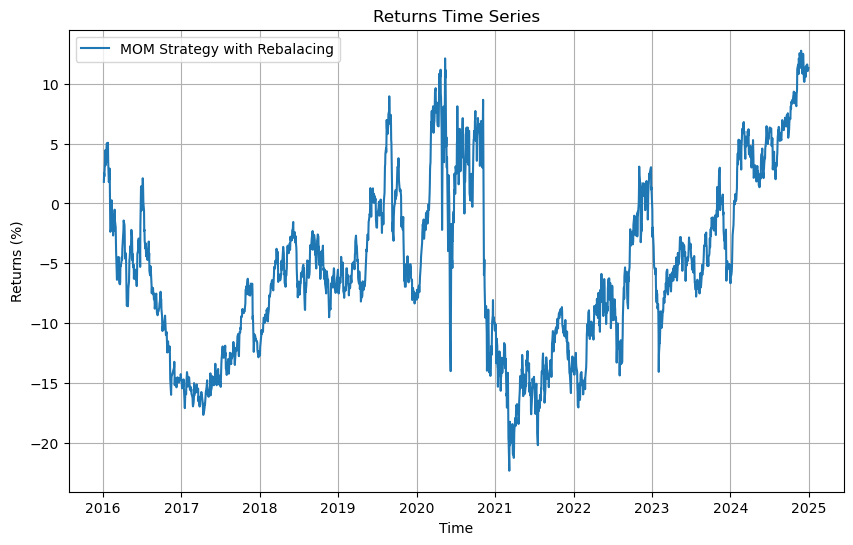

In [114]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(mom_rebalancing_portfolio.cumsum().mul(100), label='MOM Strategy with Rebalacing', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

In [115]:
# We can download the premiums in the Fama and French website
momemtum_prime = pd.read_csv(r'..\additional_data\famafrench_momentum.csv')
momemtum_prime.set_index('Date', inplace=True)
momemtum_prime.index = pd.to_datetime(momemtum_prime.index)
momemtum_prime = momemtum_prime.div(100)
momemtum_prime.columns = ['momentum']

momemtum_prime

,momentum
Date,
2015-01-02,-0.0008
2015-01-05,0.0114
2015-01-06,0.0049
2015-01-07,0.0089
2015-01-08,0.0014
...,...
2025-04-24,-0.0032
2025-04-25,0.0047
2025-04-28,0.0011


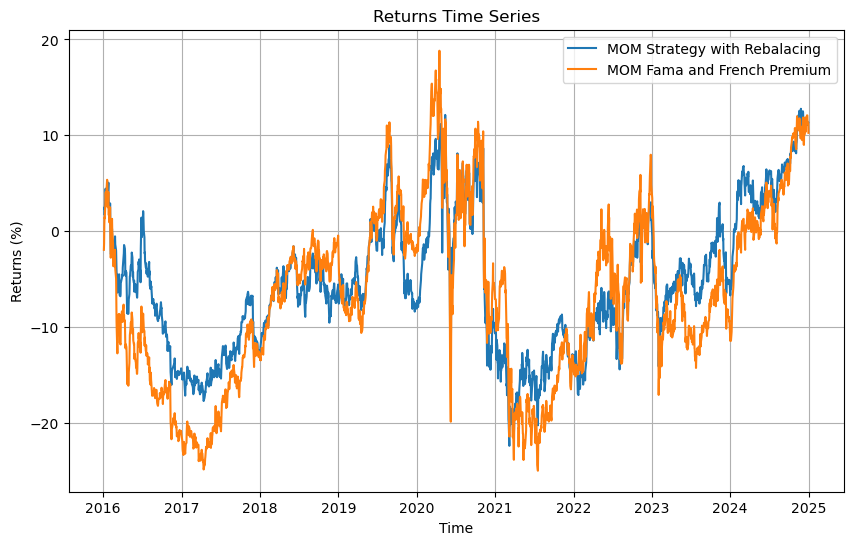

In [116]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(mom_rebalancing_portfolio.cumsum().mul(100), label='MOM Strategy with Rebalacing', alpha=1)
plt.plot(momemtum_prime.loc['2016':'2024'].cumsum().mul(100), label='MOM Fama and French Premium', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

In [117]:
# Calculate the Portfolio Correlation
mom_rebalancing_portfolio.corr(momemtum_prime['momentum'])

0.8996673469523321

Why is our portfolio so close to the Fama & French momentum premium? What they calculate is the Winners-minus-Losers premium. In our portfolio, we are shorting the loser stocks and betting in favor of the winner stocks. So, naturally, the results are very similar.